# Kindle Clippings Data Analysis

Data Analysis and Data Visualization for your Amazon Kindle Clippings!

NOTE: To use, first run [kindle_clippings_parser.ipynb](https://github.com/markwk/qs_ledger/blob/master/kindle/kindle_clippings_parser.ipynb) to parse and collect your device's clippings.

-----

## Dependencies

In [1]:
from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

----

## Simple Data Check and Data Analysis

In [2]:
my_clippings = pd.read_csv("data/clippings.csv")

In [3]:
my_clippings.columns = ['book_title', 'author', 'num_pages', 'location', 'timestamp', 'highlight']

In [4]:
print('{:,} total highlights'.format(len(my_clippings)))
print('{:,} total books'.format(len(my_clippings['book_title'].unique())))
print('{:,} total authors'.format(len(my_clippings['author'].unique())))

988 total highlights
38 total books
38 total authors


In [5]:
# date additions
my_clippings['timestamp'] = pd.to_datetime(my_clippings['timestamp'])
my_clippings['date'] = my_clippings['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d')) # note: not very efficient
my_clippings['year'] = my_clippings['timestamp'].dt.year
my_clippings['month'] = my_clippings['timestamp'].dt.month
my_clippings['mnth_yr'] = my_clippings['timestamp'].apply(lambda x: x.strftime('%Y-%m')) # note: not very efficient
my_clippings['day'] = my_clippings['timestamp'].dt.day
my_clippings['dow'] = my_clippings['timestamp'].dt.weekday
my_clippings['hour'] = my_clippings['timestamp'].dt.hour

In [6]:
my_clippings.tail()

,book_title,author,num_pages,location,timestamp,highlight,date,year,month,mnth_yr,day,dow,hour
983,"Endure: Mind, Body, and the Curiously Elastic ...",Alex Hutchinson,235,Location 3603-3604,2020-12-13 14:14:47,reverse VO2max protocol,2020-12-13,2020,12,2020-12,13,6,14
984,"Endure: Mind, Body, and the Curiously Elastic ...",Alex Hutchinson,237,Location 3634-3635,2020-12-13 23:55:27,others have identified a cognitive trait calle...,2020-12-13,2020,12,2020-12,13,6,23
985,"Endure: Mind, Body, and the Curiously Elastic ...",Alex Hutchinson,239,Location 3660-3664,2020-12-13 23:57:53,"he helped me devise a twelve-week routine, fiv...",2020-12-13,2020,12,2020-12,13,6,23
986,"Endure: Mind, Body, and the Curiously Elastic ...",Alex Hutchinson,243,Location 3723-3726,2020-12-14 00:03:51,"In 2015, Staiano and Marcora presented recentl...",2020-12-14,2020,12,2020-12,14,0,0
987,"Endure: Mind, Body, and the Curiously Elastic ...",Alex Hutchinson,245,Location 3757-3758,2020-12-14 14:33:56,the role of interoception—the brain’s monitori...,2020-12-14,2020,12,2020-12,14,0,14


----

## Highlights by Book

In [7]:
book_highlights = my_clippings['book_title'].value_counts().sort_values()

In [8]:
# book_most_highlighted = book_highlights.head(30)
(pd.DataFrame(book_highlights)).to_csv("data/book_highlights_count.csv", encoding='utf-8')

In [9]:
book_highlights_count = pd.read_csv("data/book_highlights_count.csv")

In [10]:
book_highlights_count.columns = ['book_title', 'count']

In [11]:
book_most_highlighted = book_highlights_count.tail(30)

In [12]:
# TODO: Trim long titles

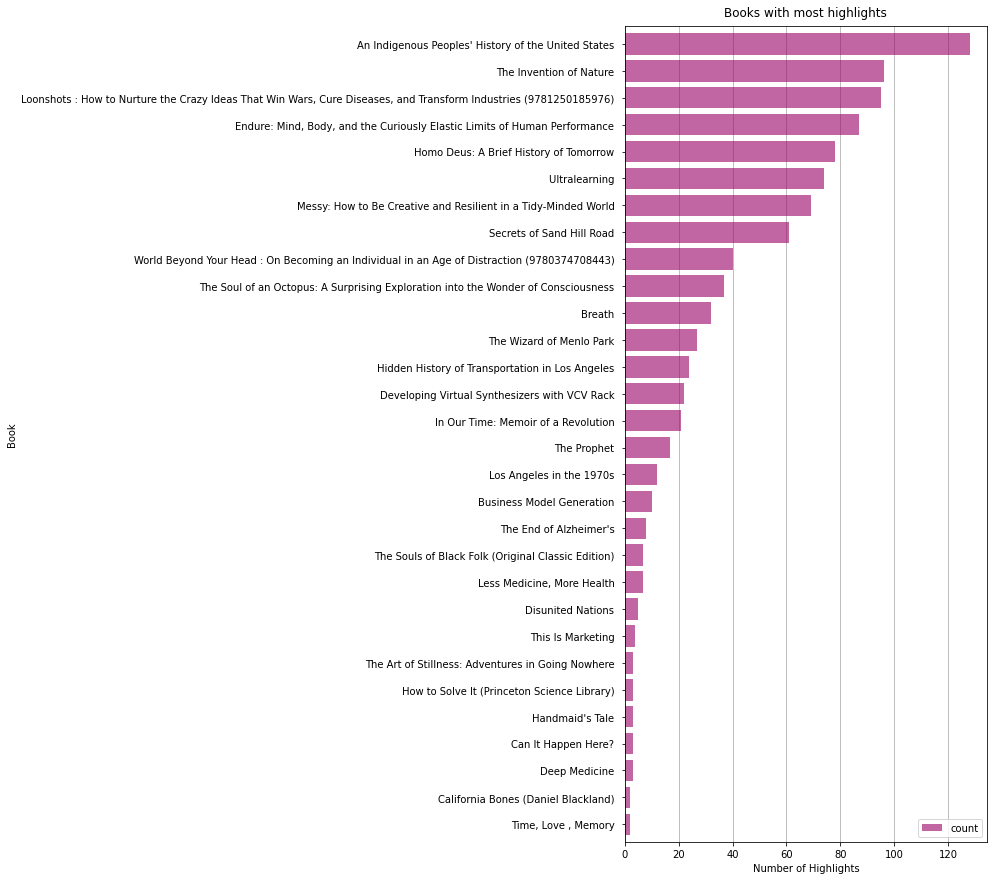

In [13]:
ax = book_most_highlighted.plot(kind='barh', figsize=[6.5, 15], width=0.8, alpha=0.6, color='#990066', 
                                    edgecolor=None, zorder=2)

n_groups = len(book_most_highlighted)
index = np.arange(n_groups)

ax.xaxis.grid(True)
ax.set_xlabel('Number of Highlights')
ax.set_ylabel("Book")
plt.yticks(index, book_most_highlighted.book_title)

ax.set_title('Books with most highlights', y=1.005)

# plt.savefig('images/lastfm-albums-played-most-h.png', dpi=96, bbox_inches='tight')
plt.show()

----

## Analysis by Year

In [14]:
year_counts = my_clippings['year'].value_counts().sort_index()
year_counts

2020    988
Name: year, dtype: int64

<ipython-input-15-e3b064be1c54>:7: UserWarning: Attempting to set identical left == right == 2020 results in singular transformations; automatically expanding.
  ax.set_xlim((year_counts.index[0], year_counts.index[-1]))


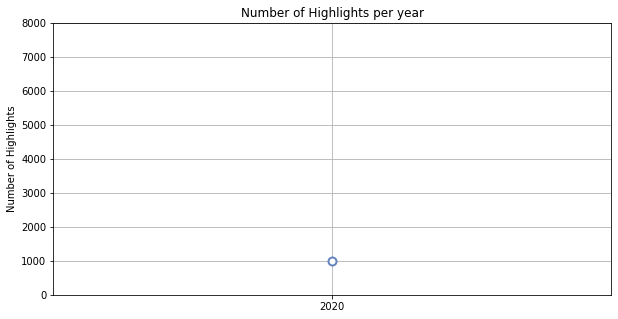

In [15]:
dataset = year_counts
chart_title = 'Number of Highlights per year'

ax = year_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 8000)
ax.set_xticks(dataset.index)
ax.set_ylabel('Number of Highlights')
ax.set_xlabel('')
ax.set_title(chart_title)

plt.show()

-----

## Monthly Analysis

In [16]:
month_counts = my_clippings['mnth_yr'].value_counts().sort_index()
month_counts.columns = ['Count']
month_counts.tail()

2020-08    208
2020-09    209
2020-10     75
2020-11    223
2020-12    117
Name: mnth_yr, dtype: int64

In [17]:
# not every month necessarily has a highlight, so fill in missing months with zero counts
#date_range = pd.date_range(start=min(highlights_10['timestamp']), end=max(highlights_10['timestamp']))
#months_range = date_range.map(lambda x: str(x.date())[:-3])
#index = np.unique(months_range)
# month_counts = month_counts.reindex(index, fill_value=0)

In [18]:
# total months
len(month_counts)

7

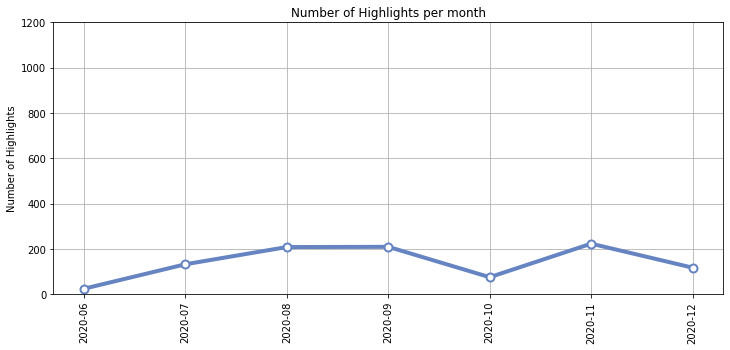

In [19]:
dataset = month_counts.tail(20)
chart_title = 'Number of Highlights per month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 1200)
ax.set_xticks(index)
ax.set_ylabel('Number of Highlights')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

-----

## Highlights Per Day

In [20]:
my_clippings.tail()

,book_title,author,num_pages,location,timestamp,highlight,date,year,month,mnth_yr,day,dow,hour
983,"Endure: Mind, Body, and the Curiously Elastic ...",Alex Hutchinson,235,Location 3603-3604,2020-12-13 14:14:47,reverse VO2max protocol,2020-12-13,2020,12,2020-12,13,6,14
984,"Endure: Mind, Body, and the Curiously Elastic ...",Alex Hutchinson,237,Location 3634-3635,2020-12-13 23:55:27,others have identified a cognitive trait calle...,2020-12-13,2020,12,2020-12,13,6,23
985,"Endure: Mind, Body, and the Curiously Elastic ...",Alex Hutchinson,239,Location 3660-3664,2020-12-13 23:57:53,"he helped me devise a twelve-week routine, fiv...",2020-12-13,2020,12,2020-12,13,6,23
986,"Endure: Mind, Body, and the Curiously Elastic ...",Alex Hutchinson,243,Location 3723-3726,2020-12-14 00:03:51,"In 2015, Staiano and Marcora presented recentl...",2020-12-14,2020,12,2020-12,14,0,0
987,"Endure: Mind, Body, and the Curiously Elastic ...",Alex Hutchinson,245,Location 3757-3758,2020-12-14 14:33:56,the role of interoception—the brain’s monitori...,2020-12-14,2020,12,2020-12,14,0,14


In [21]:
daily_counts = my_clippings['date'].value_counts().sort_index()
daily_counts.columns = ['Count']

In [22]:
# daily_counts.tail(10)

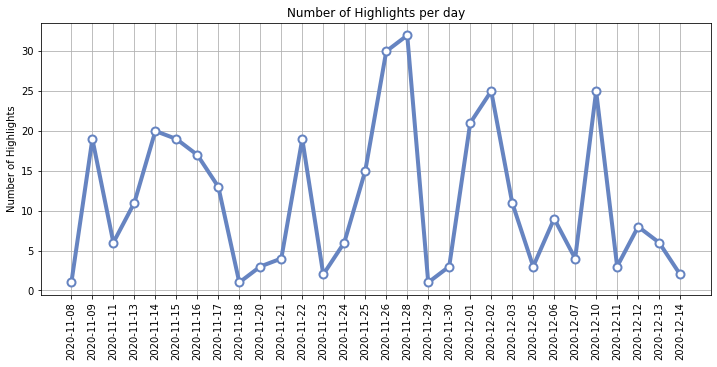

In [23]:
# a bit of a hackish solution, could use improvement
dataset = daily_counts.tail(30)
chart_title = 'Number of Highlights per day'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Number of Highlights')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

In [24]:
daily_counts.to_csv("data/daily_count_kindle_clippings.csv")

------

# Time Period Review

Example: Year in Review

In [25]:
target_period = 2020
period_clippings = my_clippings[my_clippings['year'] == target_period]

In [26]:
per_month_counts = period_clippings['mnth_yr'].value_counts().sort_index()
per_month_counts.columns = ['Count']
per_month_counts.tail(12)

2020-06     24
2020-07    132
2020-08    208
2020-09    209
2020-10     75
2020-11    223
2020-12    117
Name: mnth_yr, dtype: int64

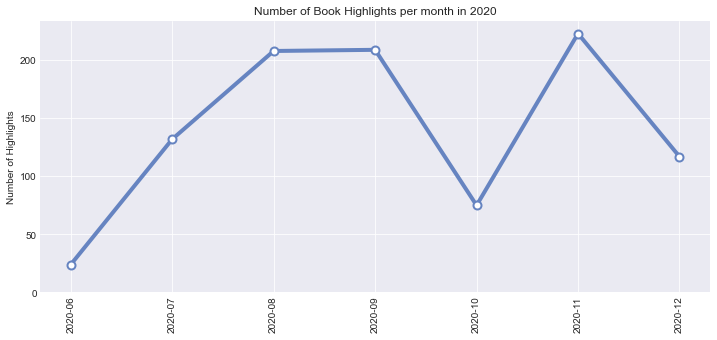

In [27]:
dataset = per_month_counts
chart_title = 'Number of Book Highlights per month in ' + str(target_period)
plt.style.use('seaborn-darkgrid')

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
max = dataset.max() + (dataset.max() * 0.05)
ax.set_ylim(0, max)
ax.set_xticks(index)
ax.set_ylabel('Number of Highlights')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

In [28]:
# Top Clipped Books in Period
top_clipped_books = period_clippings['book_title'].value_counts().sort_values(ascending=False)

In [29]:
# Period Book Highlights Summary

print('====== Kindle Highlights Summary for ' + str(target_period) + ' ======')
print('{:,} total book highlights'.format(len(period_clippings)))
print('{:} total books highlighted'.format(len(top_clipped_books)))
print('{:} average number of highlights per book'.format(round(top_clipped_books.mean(), 1)))
print(' ')

print('{:} monthly average'.format(round(per_month_counts.mean(), 1)))
print('{:} most in a month'.format(per_month_counts.max()))
print('{:} least in a month'.format(per_month_counts.min()))

print(' ')
print('Top Highlighted Books:')
for i, v in top_clipped_books.head(20).items():
    print("* " + str(v) + " in " + i)

====== Kindle Highlights Summary for 2020 ======
988 total book highlights
38 total books highlighted
26.0 average number of highlights per book
 
141.1 monthly average
223 most in a month
24 least in a month
 
Top Highlighted Books:
* 128 in An Indigenous Peoples' History of the United States 
* 96 in The Invention of Nature 
* 95 in Loonshots : How to Nurture the Crazy Ideas That Win Wars, Cure Diseases, and Transform Industries (9781250185976) 
* 87 in Endure: Mind, Body, and the Curiously Elastic Limits of Human Performance 
* 78 in Homo Deus: A Brief History of Tomorrow 
* 74 in Ultralearning 
* 69 in Messy: How to Be Creative and Resilient in a Tidy-Minded World 
* 61 in Secrets of Sand Hill Road 
* 40 in World Beyond Your Head : On Becoming an Individual in an Age of Distraction (9780374708443) 
* 37 in The Soul of an Octopus: A Surprising Exploration into the Wonder of Consciousness 
* 32 in Breath 
* 27 in The Wizard of Menlo Park 
* 24 in Hidden History of Transportation in L

# Word Cloud of Highlights

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [31]:
stopwords = set(STOPWORDS)

In [32]:
# adjust accordingly
nsw = ["medium", "new", "york", "times", "NYTimes", "Forbes", "TED", "yorker", 
       "YouTube", "nan", "Wired", "Wikipedia", "free", "encyclopedia", "WikiTravel", "best"] 
for i in nsw:
    stopwords.add(i)

In [33]:
my_clippings.columns

Index(['book_title', 'author', 'num_pages', 'location', 'timestamp',
       'highlight', 'date', 'year', 'month', 'mnth_yr', 'day', 'dow', 'hour'],
      dtype='object')

In [34]:
words_in_title = ""

for index, row in my_clippings.iterrows():
    if row["highlight"] != '':
        words_in_title =  words_in_title + " " + str(row["highlight"])

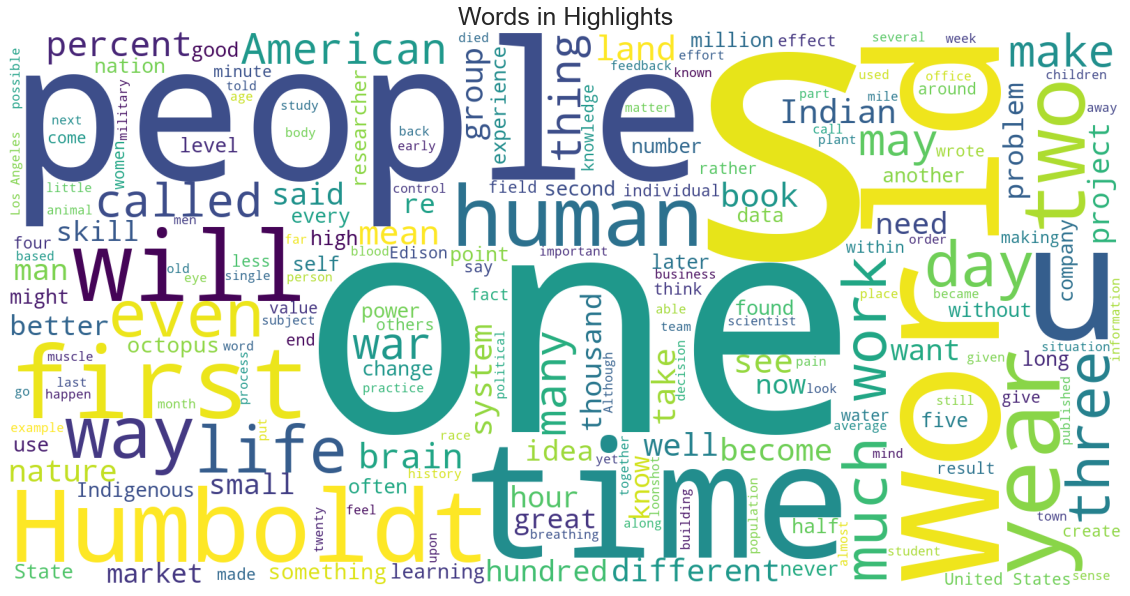

In [35]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=800)
wordcloud.generate(words_in_title)

plt.figure(figsize=(20,40))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Words in Highlights", fontsize=25)
plt.show()

# Words in Titles for a Single Year

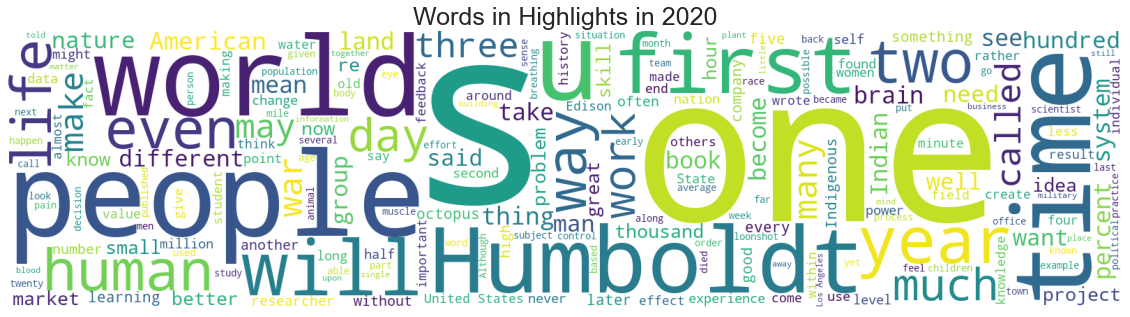

In [36]:
# Check For Single Year Only
check_year = 2020

words_in_title = ""

for index, row in my_clippings[my_clippings.year == check_year].iterrows():
    if row["highlight"] != '':
        words_in_title =  words_in_title + " " + str(row["highlight"])

        
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=400)
wordcloud.generate(words_in_title)

plt.figure(figsize=(20,60))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Words in Highlights in " + str(check_year), fontsize=25)
plt.show()